SimSun-ExtB C:\Windows\Fonts\simsunb.ttf
SimSun C:\Windows\Fonts\simsun.ttc
SimHei C:\Windows\Fonts\simhei.ttf
KaiTi C:\Windows\Fonts\simkai.ttf
  催化剂组合编号   温度  乙醇转化率(%)  乙烯选择性(%)  转化率与选择性乘积
0      A1  250      2.07      1.17     2.4219
1      A1  275      5.85      1.63     9.5355
2      A1  300     14.97      3.02    45.2094
3      A1  325     19.68      7.97   156.8496
4      A1  350     36.80     12.46   458.5280


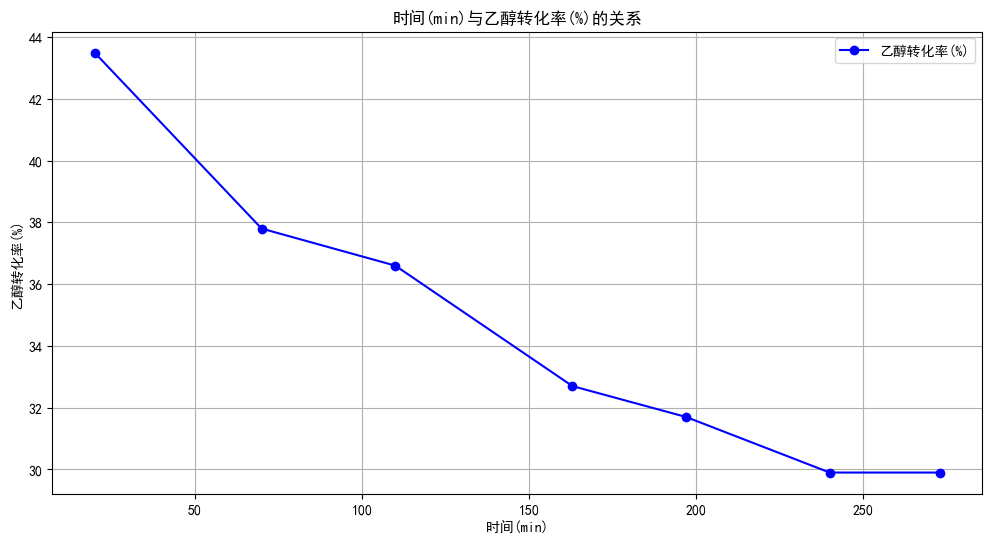

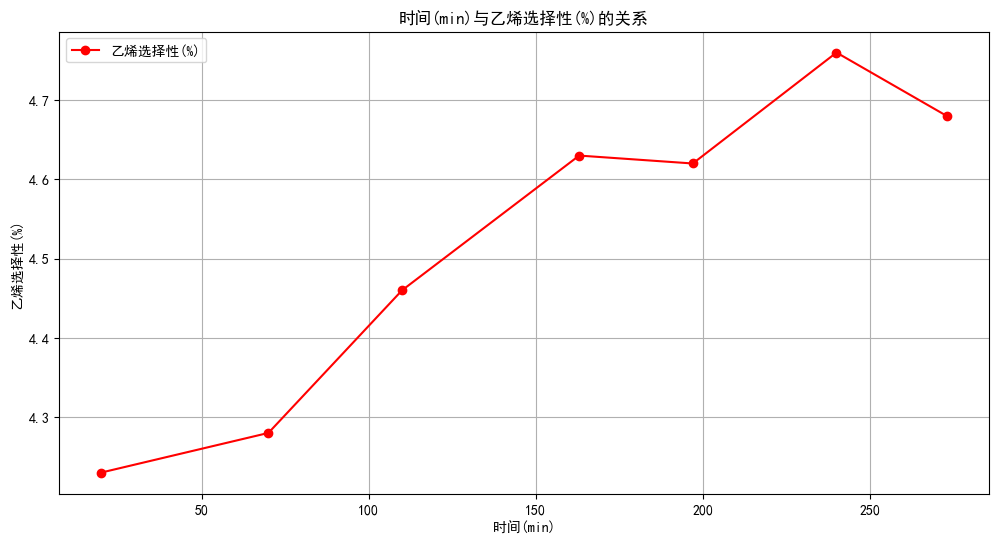

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 字体相关设置(防止中文乱码)
for font in font_manager.fontManager.ttflist:
    if 'SimHei' in font.name or 'SimSun' in font.name or 'KaiTi' in font.name:
        print(font.name, font.fname)


plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

# 数据
data_1 = {
    "催化剂组合编号": ["A1", "A1", "A1", "A1", "A1", "A2", "A2", "A2", "A2", "A2"],
    "温度": [250, 275, 300, 325, 350, 250, 275, 300, 325, 350],
    "乙醇转化率(%)": [2.07, 5.85, 14.97, 19.68, 36.80, 4.60, 17.20, 38.92, 56.38, 67.88],
    "乙烯选择性(%)": [1.17, 1.63, 3.02, 7.97, 12.46, 0.61, 0.51, 0.85, 1.43, 2.76],
    # ...
}

df_1 = pd.DataFrame(data_1)

df_1['转化率与选择性乘积'] = df_1['乙醇转化率(%)'] * df_1['乙烯选择性(%)']

# 打印数据
print(df_1.head())

# 附件二
data_2 = {
    "时间(min)": [20, 70, 110, 163, 197, 240, 273],
    "乙醇转化率(%)": [43.5, 37.8, 36.6, 32.7, 31.7, 29.9, 29.9],
    "乙烯选择性(%)": [4.23, 4.28, 4.46, 4.63, 4.62, 4.76, 4.68],
    # ...
}

df_2 = pd.DataFrame(data_2)

# 绘制“时间(min)”与“乙醇转化率(%)”的折线图
plt.figure(figsize=(12, 6))
plt.plot(df_2['时间(min)'], df_2['乙醇转化率(%)'], marker='o', linestyle='-', color='b', label='乙醇转化率(%)')
plt.title('时间(min)与乙醇转化率(%)的关系')
plt.xlabel('时间(min)')
plt.ylabel('乙醇转化率(%)')
plt.legend()
plt.grid(True)
plt.show()

# 绘制“时间(min)”与“乙烯选择性(%)”的折线图
plt.figure(figsize=(12, 6))
plt.plot(df_2['时间(min)'], df_2['乙烯选择性(%)'], marker='o', linestyle='-', color='r', label='乙烯选择性(%)')
plt.title('时间(min)与乙烯选择性(%)的关系')
plt.xlabel('时间(min)')
plt.ylabel('乙烯选择性(%)')
plt.legend()
plt.grid(True)
plt.show()


折线图


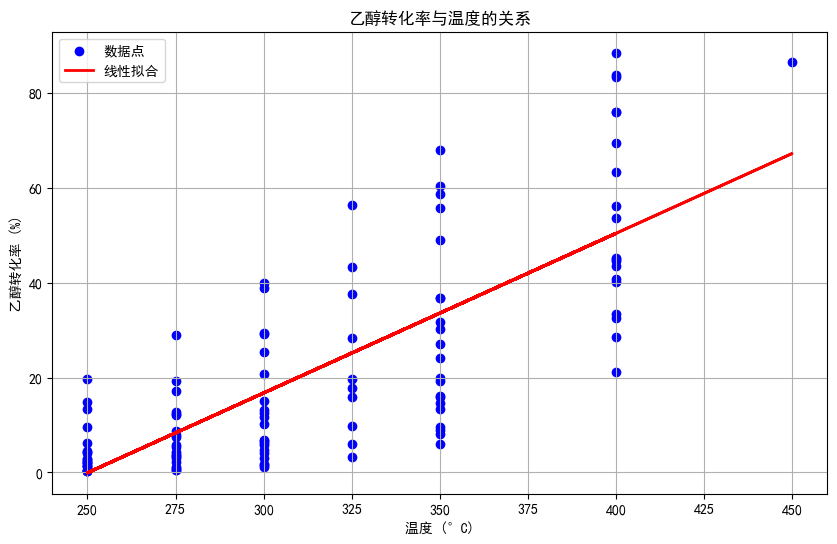

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
data = pd.read_excel('fujian-1.xlsx')  # 根据实际情况调整sheet_name

# 提取数据
temperatures = data['温度']
ethanol_conversion_rates = data['乙醇转化率(%)']

# 线性拟合
coefficients_ethanol = np.polyfit(temperatures, ethanol_conversion_rates, 1)
polynomial_ethanol = np.poly1d(coefficients_ethanol)

# 生成预测值
fit_values_ethanol = polynomial_ethanol(temperatures)

# 绘制散点图和拟合线
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, ethanol_conversion_rates, color='blue', label='数据点')
plt.plot(temperatures, fit_values_ethanol, color='red', label='线性拟合', linewidth=2)
plt.xlabel('温度 (°C)')
plt.ylabel('乙醇转化率 (%)')
plt.title('乙醇转化率与温度的关系')
plt.legend()
plt.grid(True)
plt.show()


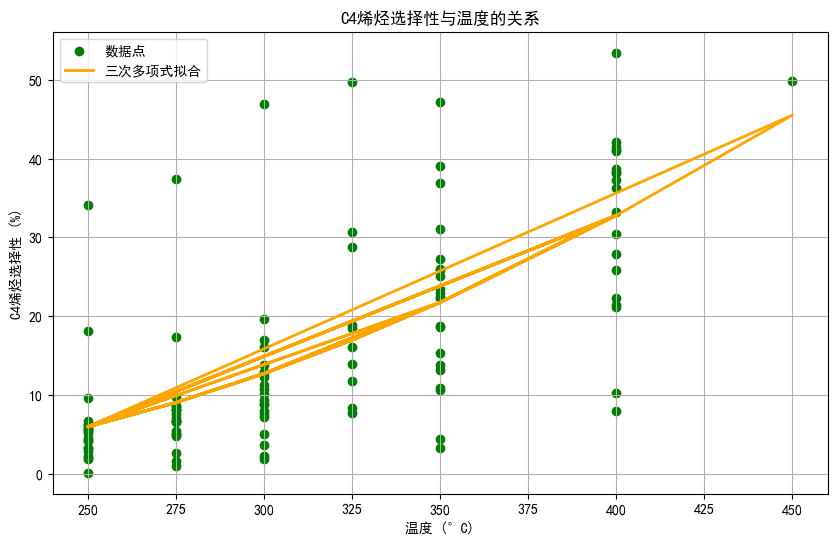

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
data = pd.read_excel('fujian-1.xlsx')  
# 提取数据
temperatures = data['温度']
c4_olefins_selectivity = data['C4烯烃选择性(%)']

# 三次多项式拟合
coefficients_c4 = np.polyfit(temperatures, c4_olefins_selectivity, 3)
polynomial_c4 = np.poly1d(coefficients_c4)

# 生成预测值
fit_values_c4 = polynomial_c4(temperatures)

# 绘制散点图和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, c4_olefins_selectivity, color='green', label='数据点')
plt.plot(temperatures, fit_values_c4, color='orange', label='三次多项式拟合', linewidth=2)
plt.xlabel('温度 (°C)')
plt.ylabel('C4烯烃选择性 (%)')
plt.title('C4烯烃选择性与温度的关系')
plt.legend()
plt.grid(True)
plt.show()


base

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('fujian-1.xlsx')  # 根据实际情况调整sheet_name

# 提取数据
temperatures = data['温度'].values
ethanol_conversion_rates = data['乙醇转化率(%)'].values

# 数据预处理
temperatures = temperatures.reshape(-1, 1)  # 特征需要是二维的
ethanol_conversion_rates = ethanol_conversion_rates.reshape(-1, 1)  # 标签需要是二维的

# 构建BP神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(temperatures, ethanol_conversion_rates, epochs=100, batch_size=5, verbose=1)

# 生成预测值
predictions = model.predict(temperatures)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, ethanol_conversion_rates, color='blue', label='实际数据')
plt.plot(temperatures, predictions, color='red', label='BP神经网络预测', linewidth=2)
plt.xlabel('温度 (°C)')
plt.ylabel('乙醇转化率 (%)')
plt.title('乙醇转化率与温度的BP神经网络预测')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'tensorflow'